<a href="https://colab.research.google.com/github/joaopedropastura/keras/blob/main/keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras
!pip install pandas


In [11]:
import keras
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv('/content/admission_dataset.csv')

In [13]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,315,105,3,2.0,2.5,8.48,0,0.75
1,321,112,5,5.0,5.0,9.06,1,0.86
2,327,103,3,4.0,4.0,8.30,1,0.74
3,305,112,3,3.0,3.5,8.65,0,0.71
4,297,96,2,2.5,1.5,7.89,0,0.43
...,...,...,...,...,...,...,...,...
395,320,111,4,4.5,3.5,8.87,1,0.85
396,305,103,2,2.5,3.5,8.13,0,0.59
397,305,107,2,2.5,2.5,8.42,0,0.71
398,320,104,3,3.0,2.5,8.57,1,0.74


from matplotlib import pyplot as plt
data['GRE Score'].plot(kind='hist', bins=20, title='GRE Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['TOEFL Score'].plot(kind='hist', bins=20, title='TOEFL Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['University Rating'].plot(kind='hist', bins=20, title='University Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['SOP'].plot(kind='hist', bins=20, title='SOP')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='GRE Score', y='TOEFL Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='TOEFL Score', y='University Rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='University Rating', y='SOP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='SOP', y='LOR ', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['GRE Score'].plot(kind='line', figsize=(8, 4), title='GRE Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['TOEFL Score'].plot(kind='line', figsize=(8, 4), title='TOEFL Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['University Rating'].plot(kind='line', figsize=(8, 4), title='University Rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['SOP'].plot(kind='line', figsize=(8, 4), title='SOP')
plt.gca().spines[['top', 'right']].set_visible(False)

In [16]:
for i in data:
  print(i)

GRE Score
TOEFL Score
University Rating
SOP
LOR 
CGPA
Research
Chance of Admit 


In [18]:
y = data['Chance of Admit ']
x = data.drop('Chance of Admit ', axis=1)

X_train, X_test, Y_train, Y_test = \
  train_test_split(x, y, test_size=0.2, random_state=50)


X_train.shape

(320, 7)

In [34]:
model = Sequential()


model.add(Dense(units=3, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=1, activation='linear'))



In [35]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
result = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_test, Y_test))



Epoch 1/50
10/10 [==============================] - 1s 34ms/step - loss: 217.5406 - mae: 14.6371 - val_loss: 137.3443 - val_mae: 11.6774
Epoch 2/50
10/10 [==============================] - 0s 7ms/step - loss: 93.4801 - mae: 9.5371 - val_loss: 48.0645 - val_mae: 6.8867
Epoch 3/50
10/10 [==============================] - 0s 10ms/step - loss: 27.7601 - mae: 5.1054 - val_loss: 9.5351 - val_mae: 3.0182
Epoch 4/50
10/10 [==============================] - 0s 10ms/step - loss: 4.0204 - mae: 1.8001 - val_loss: 0.5441 - val_mae: 0.6069
Epoch 5/50
10/10 [==============================] - 0s 8ms/step - loss: 0.3787 - mae: 0.4975 - val_loss: 0.7781 - val_mae: 0.7419
Epoch 6/50
10/10 [==============================] - 0s 9ms/step - loss: 0.8891 - mae: 0.8218 - val_loss: 1.0354 - val_mae: 0.8766
Epoch 7/50
10/10 [==============================] - 0s 11ms/step - loss: 0.7448 - mae: 0.7338 - val_loss: 0.5922 - val_mae: 0.6412
Epoch 8/50
10/10 [==============================] - 0s 9ms/step - loss: 0.355

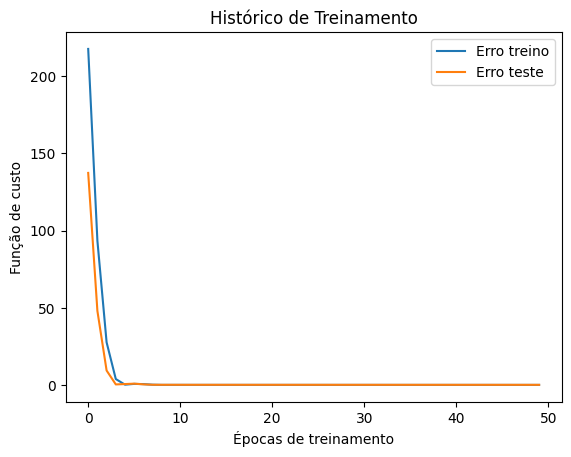

In [36]:
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Histórico de Treinamento')
plt.ylabel('Função de custo')
plt.xlabel('Épocas de treinamento')
plt.legend(['Erro treino', 'Erro teste'])
plt.show()

